## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- ##### As there are no null values no need to handle that

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Dropping Date ,casual,registered and instant columns as instant is indexing and date is not significant as we have month and years
# and cnt variable is addition of causal and registered
df.drop(['dteday','instant','casual','registered'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

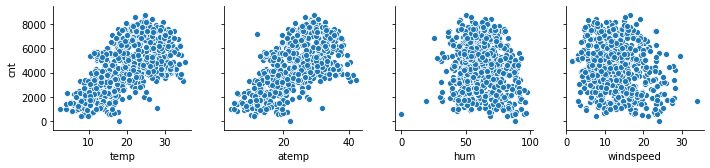

In [8]:
sns.pairplot(df, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')
plt.show()

- ##### From numeric variable visualisation its clear that temp and atemp are in linear relation ship with Count

#### Visualising Categorical Variables

As there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [9]:
# Converting Season,month and Weathersit Categorical Variables into string
df['season']= df['season'].map({1 : 'spring', 2 :'summer', 3 :'fall', 4: 'winter'})
df['weathersit']= df['weathersit'].map({1 : 'Clear', 2 :'Mist', 3 :'Light Snow', 4:'Heavy Rain'})
# df['mnth'] = df['mnth'].map({1:'January', 2:'February', 3:'March',4:'April',5:'May', 6:'June',7:'July',8:'August',9:'September',10:'October',
#                               11:'November', 12:'December'})
# df['weekday'] = df['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday', 5:'Friday',6:'Saturday'})
# df.head()

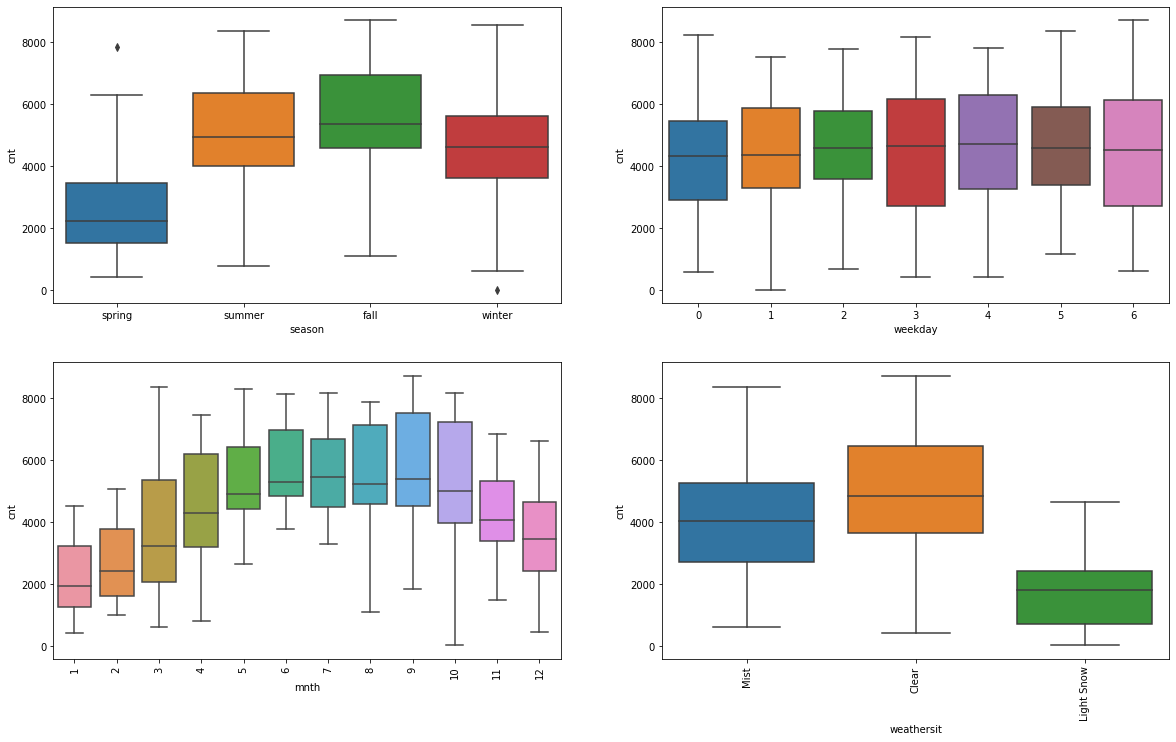

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
plt.xticks(rotation=90)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

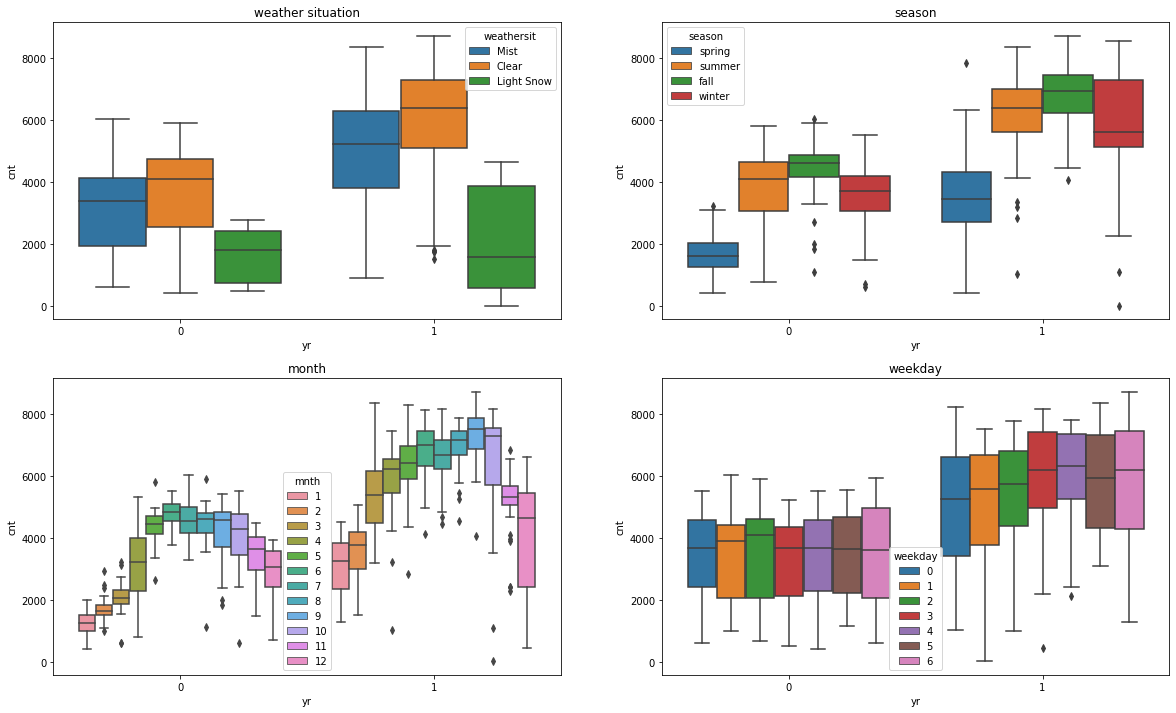

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.title('weather situation')
sns.boxplot(x = 'yr', y = 'cnt',hue = 'weathersit', data = df)

plt.subplot(2,2,2)
plt.title('season')
sns.boxplot(x = 'yr', y = 'cnt', hue = 'season',data = df)

plt.subplot(2,2,3)
plt.title('month')
sns.boxplot(x = 'yr', y = 'cnt',hue = 'mnth', data = df)

plt.subplot(2,2,4)
plt.title('weekday')
sns.boxplot(x = 'yr', y = 'cnt',hue = 'weekday', data = df)
plt.show()


- ####	Based on season bike sharing is in order of Fall>summer>winter>spring
    In fall season bike sharing is more than other seasons.    
- ####	Based on weather situation bike sharing is in order of clear>mist>light snow
    In clear weather situation bike sharing is more    
- ####	Median for Thursday, Wednesday and Saturday is same
- ####	In September Bike sharing is more
- ####	In 2019 bike sharing is more than 2018
- ####	in 2019 Bikes sharing is more for clear weather, in fall season and in September month
- #### In 2019 Saturdays are having more Bike sharing

In [12]:
df.corr()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.067534,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [13]:
# Removing atemp variable as atemp and temp are having high corelation
df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

### Dummy Variables

In [14]:
 # Creating Dummy Variables from categorical variable
new_mnth=pd.get_dummies(df['mnth'],drop_first=True)
new_mnth=new_mnth.rename(columns={1:'jan', 2:'feb', 3:'mar', 4:'apr',
                                  5:'may', 6:'jun', 7:'jul', 8:'aug',
                                  9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [15]:
new_mnth

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [16]:
new_season = pd.get_dummies(df['season'],drop_first= True)
new_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
new_week = pd.get_dummies(df['weekday'],drop_first= True)
new_week=new_week.rename(columns={0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday',
                                  4:'thursday', 5:'friday', 6:'saturday'})

In [18]:
new_week

,monday,tuesday,wednesday,thursday,friday,saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [19]:
new_weather = pd.get_dummies(df['weathersit'],drop_first= True)
new_weather

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [20]:
df = pd.concat([df, new_mnth, new_season, new_week, new_weather], axis = 1)

In [21]:
df.drop(['mnth','season','weekday','weathersit'], axis = 1, inplace = True)

In [22]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### Splitting the Data into Training and Testing Sets

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
num_vars =['temp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,0,...,0,1,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,0,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.066667,0.098039,0.078431,...,0.245098,0.24902,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.249689,0.297660,0.269113,...,0.430568,0.43287,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.591508,-1.991603e-02,-0.005172,0.053776,...,0.013856,-0.022638,0.053634,-0.000296,-0.001452,-0.006153,-0.011876,-0.033817,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.095961,5.652428e-02,-0.053321,-0.000907,...,-0.063232,0.050712,0.279279,-0.062897,-0.070276,0.009759,-0.024505,-0.069242,-2.815377e-02,-0.038279
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,0.092320,-1.680257e-02,0.030677,-0.000917,...,0.043274,-0.057297,0.174565,0.268948,0.300501,0.246594,0.251739,-0.619074,2.115873e-02,0.040766
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.643517,-2.960214e-01,-0.179694,-0.050597,...,0.125582,-0.233697,-0.032126,0.046646,0.029363,0.002827,0.015943,-0.042274,-3.609266e-02,-0.090161
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.059993,-1.295442e-01,-0.110761,-0.132898,...,-0.013216,0.171579,0.022612,0.010123,0.047185,-0.038222,-0.016161,-0.040521,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.253794,1.331228e-01,0.142173,0.183530,...,0.110089,-0.090649,-0.004372,-0.005849,-0.019567,-0.004353,-0.015764,0.049356,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,1.000000,-2.702870e-01,-0.137537,0.022998,...,0.134343,0.032636,-0.009552,0.031883,0.025216,0.009710,0.024581,-0.016215,-2.265984e-01,-0.175530
feb,-0.019916,0.056524,-0.016803,-0.296021,-0.129544,0.133123,-0.270287,1.000000e+00,-0.088113,-0.077968,...,-0.152286,-0.153900,-0.002927,0.035680,-0.008602,-0.035457,0.015714,-0.027519,-1.133121e-16,-0.011038
mar,-0.005172,-0.053321,0.030677,-0.179694,-0.110761,0.142173,-0.137537,-8.811342e-02,1.000000,-0.096181,...,0.088068,-0.189849,-0.010111,-0.011099,0.001061,0.045260,-0.007366,0.022870,2.066101e-02,-0.002179
apr,0.053776,-0.000907,-0.000917,-0.050597,-0.132898,0.183530,0.022998,-7.796812e-02,-0.096181,1.000000,...,0.511984,-0.167990,0.019572,0.016087,-0.007042,-0.028606,-0.002144,-0.003952,-7.617551e-03,-0.011145


### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 4: Building a linear model

In [30]:
# Using RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('feb', False, 6),
 ('mar', True, 1),
 ('apr', True, 1),
 ('may', True, 1),
 ('jun', True, 1),
 ('jul', False, 9),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', False, 2),
 ('nov', False, 13),
 ('dec', False, 14),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('monday', False, 7),
 ('tuesday', False, 8),
 ('wednesday', False, 11),
 ('thursday', False, 12),
 ('friday', False, 10),
 ('saturday', False, 3),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [33]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mar', 'apr', 'may', 'jun',
       'aug', 'sep', 'spring', 'winter', 'Light Snow', 'Mist'],
      dtype='object')

In [34]:
X_train = X_train[col]
X_train_rfe = X_train[col]

In [35]:
import statsmodels.api as sm
X_train_rfe= sm.add_constant(X_train_rfe)

In [36]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.99e-188
Time:                        20:27:45   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2513.9385    291.901      8.612      0.0

##### Checking VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.74
2,temp,16.09
4,windspeed,4.69
11,spring,3.62
12,winter,3.29
14,Mist,2.26
0,yr,2.09
9,aug,1.93
7,may,1.77
6,apr,1.69


### Dropping the variable and updating the model

In [38]:
# Dropping highly correlated variables and insignificant variables
# As hum is having infinite VIF dropping it
X_train_New =X_train.drop(['hum'],1)

In [39]:
X_train_lm = sm.add_constant(X_train_New)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.23e-185
Time:                        20:27:45   Log-Likelihood:                -4123.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1786.3290    236.994      7.537      0.0

In [40]:

vif = pd.DataFrame()
vif['Features'] = X_train_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_New.values, i) for i in range(X_train_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.49
3,windspeed,4.68
10,spring,2.10
0,yr,2.08
11,winter,1.94
8,aug,1.91
7,jun,1.65
6,may,1.59
13,Mist,1.55
5,apr,1.53


### Dropping the variable and updating the model

In [41]:
X_train_New1 =X_train_New.drop(['aug'],1)
X_train_lm1 = sm.add_constant(X_train_New1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.73e-185
Time:                        20:27:46   Log-Likelihood:                -4127.1
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1885.5890    235.664      8.001      0.0

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_New1.columns
vif['VIF'] = [variance_inflation_factor(X_train_New1.values, i) for i in range(X_train_New1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.46
0,yr,2.08
9,spring,1.99
10,winter,1.63
12,Mist,1.54
5,apr,1.38
7,jun,1.35
6,may,1.32
4,mar,1.29


### Dropping the variable and updating the model

In [43]:
X_train_New2 =X_train_New1.drop(['jun'],1)
X_train_lm2 = sm.add_constant(X_train_New2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-185
Time:                        20:27:46   Log-Likelihood:                -4129.3
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1949.4854    234.386      8.317      0.0

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_New2.columns
vif['VIF'] = [variance_inflation_factor(X_train_New2.values, i) for i in range(X_train_New2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
8,spring,1.95
9,winter,1.55
11,Mist,1.53
5,apr,1.33
4,mar,1.28
6,may,1.25
7,sep,1.20


### Dropping the variable and updating the model

In [45]:
X_train_New3 =X_train_New2.drop(['apr'],1)
X_train_lm3 = sm.add_constant(X_train_New3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-185
Time:                        20:27:46   Log-Likelihood:                -4132.1
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2196.3325    210.455     10.436      0.0

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_New3.columns
vif['VIF'] = [variance_inflation_factor(X_train_New3.values, i) for i in range(X_train_New3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.01
2,temp,3.90
0,yr,2.05
7,spring,1.78
10,Mist,1.52
8,winter,1.43
4,mar,1.26
5,may,1.21
6,sep,1.19
9,Light Snow,1.08


### Dropping the variable and updating the model

In [47]:
X_train_New4 =X_train_New3.drop(['may'],1)
X_train_lm4 = sm.add_constant(X_train_New4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.36e-184
Time:                        20:27:46   Log-Likelihood:                -4136.0
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     499   BIC:                             8341.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2309.4029    207.839     11.111      0.0

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_New4.columns
vif['VIF'] = [variance_inflation_factor(X_train_New4.values, i) for i in range(X_train_New4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,temp,3.75
0,yr,2.05
6,spring,1.75
9,Mist,1.50
7,winter,1.38
4,mar,1.25
5,sep,1.16
8,Light Snow,1.08
1,holiday,1.05


### Dropping the variable and Building Final Model

In [49]:
# Final Model
X_train_New5 =X_train_New4.drop(['mar'],1)
X_train_lm5 = sm.add_constant(X_train_New5)
lm_model = sm.OLS(y_train,X_train_lm5).fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.31e-184
Time:                        20:27:46   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8300.
Df Residuals:                     500   BIC:                             8342.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2343.4400    208.810     11.223      0.0

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_New5.columns
vif['VIF'] = [variance_inflation_factor(X_train_New5.values, i) for i in range(X_train_New5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
5,spring,1.65
8,Mist,1.50
6,winter,1.37
4,sep,1.16
7,Light Snow,1.08
1,holiday,1.04


## Step 5: Assumption Validation

In [51]:
y_train_pred = lm_model.predict(X_train_lm5)

##### 1. Residual Analysis

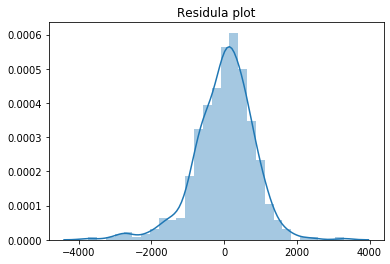

In [52]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Residula plot')
plt.show()

- #### Distribution of error is almost cantered around 0

##### 2. Validating Multicollinearity

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_New5.columns
vif['VIF'] = [variance_inflation_factor(X_train_New5.values, i) for i in range(X_train_New5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
5,spring,1.65
8,Mist,1.50
6,winter,1.37
4,sep,1.16
7,Light Snow,1.08
1,holiday,1.04


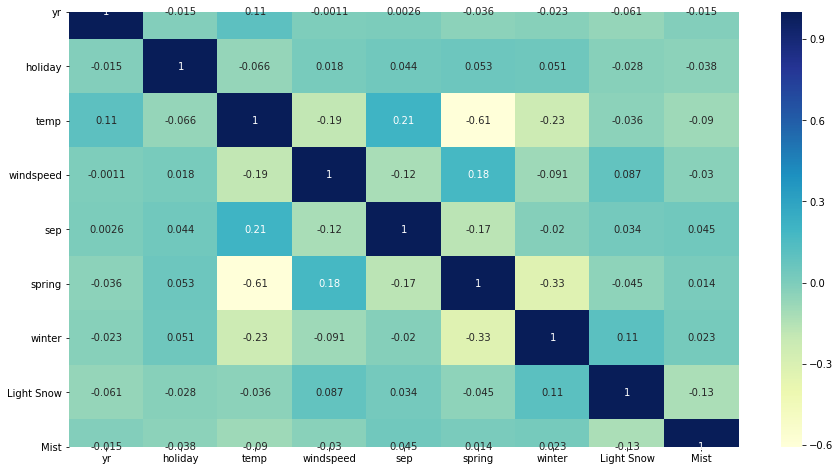

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(X_train_New5.corr(), cmap="YlGnBu", annot = True, ax= ax)

plt.show()

#X_train_New5.corr()

- ##### For all independent variable VIF is less than 5
- ##### In Heatplot the magnitude of the correlation coefficients should be less than .80

#### Hence Multicollinearity is not there

##### 3. Validating Homoscedaticity

Text(0, 0.5, 'res')

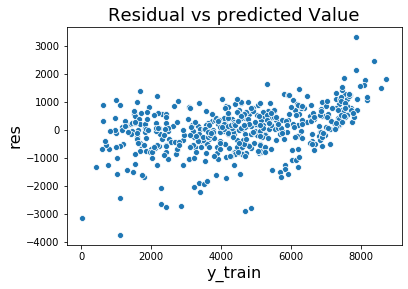

In [55]:
# Validating Homoscedasticity
sns.scatterplot(y_train,res)
plt.title('Residual vs predicted Value', fontsize= 18)
plt.xlabel('y_train', fontsize = 16)                        
plt.ylabel('res', fontsize = 16) 

- ##### No clear pattern in the distribution, hence Homoscedasticity is not there

## Step 5: Prediction and Evaluation on Test set

In [56]:
# Scaling on Test data
num_vars =['temp','hum','windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [57]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,0,0,...,1,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.100457,0.054795,0.091324,...,0.264840,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.301297,0.228100,0.288730,...,0.442259,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# add constant to Test data
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,feb,mar,apr,...,summer,winter,monday,tuesday,wednesday,thursday,friday,saturday,Light Snow,Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,...,1,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [61]:
# Drop Variables all the variables not available in our model
X_test_lm = X_test_lm[['const','yr','holiday','temp','windspeed','sep','spring','winter','Light Snow','Mist']]


In [62]:
X_test_lm.head()

,const,yr,holiday,temp,windspeed,sep,spring,winter,Light Snow,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


###### Checking Adjusted R2 and r2 for Test data

In [63]:
# ADjusted R2 for test data
test_lm_model = sm.OLS(y_test,X_test_lm).fit()
print(test_lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.42e-72
Time:                        20:27:47   Log-Likelihood:                -1777.5
No. Observations:                 219   AIC:                             3575.
Df Residuals:                     209   BIC:                             3609.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2237.9906    338.122      6.619      0.0

- ##### As Rsquared and adjusted R2 for test and train data are oin within 5% variance, Model is stable

In [64]:
# predict
y_test_pred = lm_model.predict(X_test_lm)

In [65]:
# Evaluation r2 score for Test data
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
r_squared=r2_score(y_true= y_test,y_pred=y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 702813.2142065342
r_square_value : 0.8041402474517901


In [66]:
# Evaluation r2 score for Train data
mse = mean_squared_error(y_train, y_train_pred)
r_squared=r2_score(y_true= y_train,y_pred=y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 657726.256272283
r_square_value : 0.8270712053018549


- ##### variance between r2_score of test and train data is within 5%

Text(0, 0.5, 'y_test_pred')

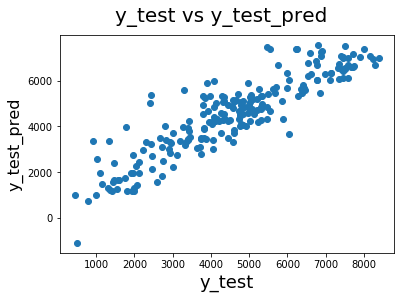

In [67]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                           
plt.ylabel('y_test_pred', fontsize = 16)  


#### Linear equation for Best fit line:

$ price = 2045.7061  \times  yr - 843.2761  \times  holiday + 3544.8227 \times temp - 1178.3391 \times windspeed + 608.3051 \times sep - 1009.8409 \times spring + 416.8524 \times winter - 2507.3109 \times light snow - 683.1661 \times Mist $

### Recommendation: 
#### Bike sharing is decreasing in below conditions:
- ###### If it holiday
- ###### In spring season
- ###### In light snow and mist season
- ###### In windspeed
#### Bike sharing is Increasing in below conditions:
- ###### In Year 2019
- ###### In Winter and September month
- ###### Increasing based on temp